<a href="https://colab.research.google.com/github/Jmarsaki/trabajo_evaluativo_191022/blob/main/Examen_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema se intenta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





El problema que se intenta resolver aquí es de un algoritmo supervisado, más precisamente de regresión lineal

Se importaran las librerias

In [85]:
# Tratamiento de datos
# ==============================================================================
from sklearn import datasets
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


Generamos los datos

In [86]:
# Datos
# ==============================================================================
df = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
df=df.replace(np.nan,"0")
df

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


Se toman las siguientes columnas para obtener el siguente dataframe


In [87]:
# Se toman las siguientes columnas para obtener el siguente dataframe
datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico': periodico, 'ventas': ventas})
datos

,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Se correlacionan mutuamente las columnas

In [88]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,tv,ventas,0.782224,0.782224
12,ventas,tv,0.782224,0.782224
7,radio,ventas,0.576223,0.576223
13,ventas,radio,0.576223,0.576223
6,radio,periodico,0.354104,0.354104
9,periodico,radio,0.354104,0.354104
11,periodico,ventas,0.228299,0.228299
14,ventas,periodico,0.228299,0.228299
2,tv,periodico,0.056648,0.056648
8,periodico,tv,0.056648,0.056648


Se grafica la matriz de correlaciones

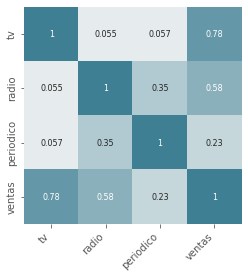

In [89]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

También se grafican la distribución para cada variable numérica

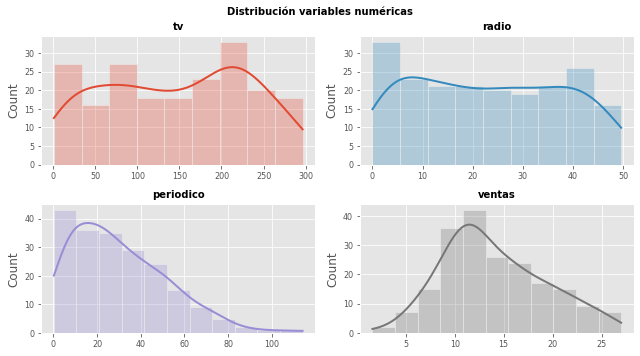

In [90]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

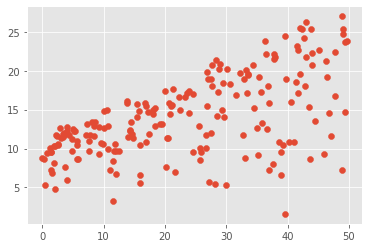

In [91]:
plt.scatter(datos['radio'],datos['ventas'])

Toda esta preparación sirve para realizar el testeo y el entrenamiento 

In [92]:
# División de los datos en train y test
# ==============================================================================
# Las variables pueden funcionar como predictores u variables objetos

X = datos[['tv']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X = datos[['radio']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X = datos[['periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X = datos[['periodico']]
y = datos['tv']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Finalmente se crea el modelo aplicando el algoritmo

In [93]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2819
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.596
Time:                        20:45:20   Log-Likelihood:                -935.32
No. Observations:                 160   AIC:                             1875.
Df Residuals:                     158   BIC:                             1881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3856     11.706     12.932      0.0

Finalmente se diagnostican los errores graficándolos

In [94]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

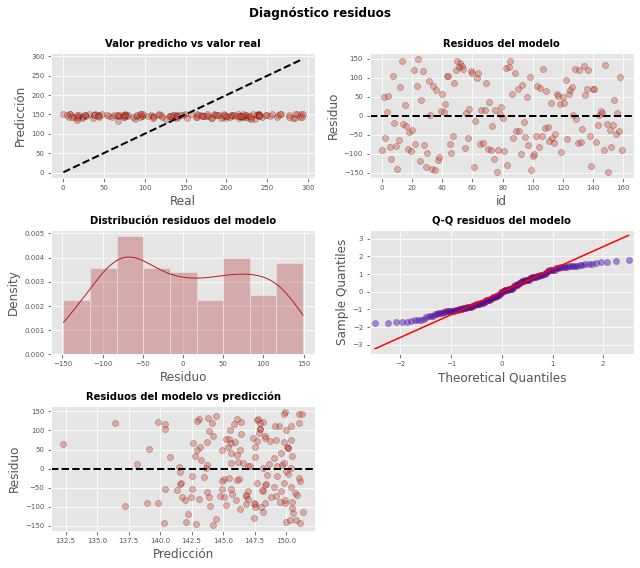

In [95]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

#Problema resuelto desde modelo de árbol de decisión

Ahora se aplica otro algoritmo para resolver el problema sobre el mismo set de datos.

Se importan las librerías correspondientes

In [52]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

Se cargan los datos

In [64]:
# Datos
# ==============================================================================
df = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
df

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9
...,...,...,...,...,...,...,...
195,196,196,38.2,3.7,13.8,248.841073,7.6
196,197,197,94.2,4.9,8.1,118.041856,9.7
197,198,198,177.0,9.3,6.4,213.274671,12.8
198,199,199,283.6,42.0,66.2,237.498063,25.5


In [66]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   periodico  200 non-null    float64
 3   ventas     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Se van dividiendo los datos para realizar el testeo y entrenamiento sobre los datos

In [67]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "Sales"),
                                        df['Sales'],
                                        random_state = 125
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 125
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=125)

Se obtiene el árbol correspondiente

Profundidad del árbol: 3
Número de nodos terminales: 8


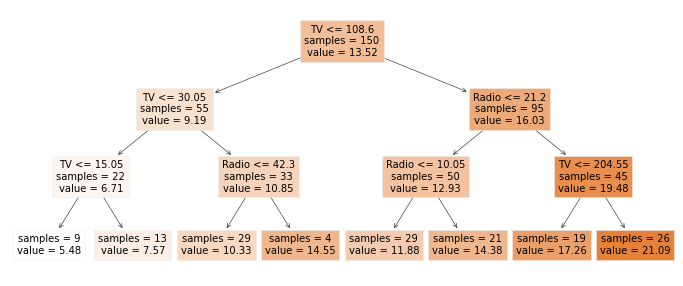

In [69]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df.drop(columns = "Sales").columns,
            class_names   = 'Sales',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Ahora se analizan los predictores

In [72]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(df.drop(columns = "Sales").columns)
               )
print(texto_modelo)

|--- TV <= 108.60
|   |--- TV <= 30.05
|   |   |--- TV <= 15.05
|   |   |   |--- value: [5.48]
|   |   |--- TV >  15.05
|   |   |   |--- value: [7.57]
|   |--- TV >  30.05
|   |   |--- Radio <= 42.30
|   |   |   |--- value: [10.33]
|   |   |--- Radio >  42.30
|   |   |   |--- value: [14.55]
|--- TV >  108.60
|   |--- Radio <= 21.20
|   |   |--- Radio <= 10.05
|   |   |   |--- value: [11.88]
|   |   |--- Radio >  10.05
|   |   |   |--- value: [14.38]
|   |--- Radio >  21.20
|   |   |--- TV <= 204.55
|   |   |   |--- value: [17.26]
|   |   |--- TV >  204.55
|   |   |   |--- value: [21.09]



In [74]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "Sales").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,TV,0.638389
3,Radio,0.361611
0,Unnamed: 0,0.000000
1,X,0.000000
4,Newspaper,0.000000
5,Web,0.000000


In [ ]:
Para mejorar el modelo, se aplica un pruning por validación cruzada

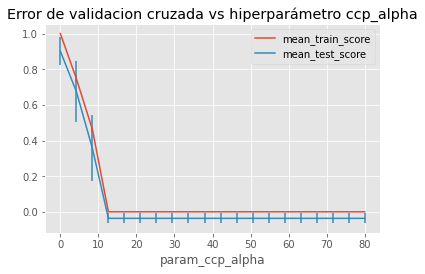

In [75]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [76]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

Así se obtiene un mejor resultado

Profundidad del árbol: 12
Número de nodos terminales: 141


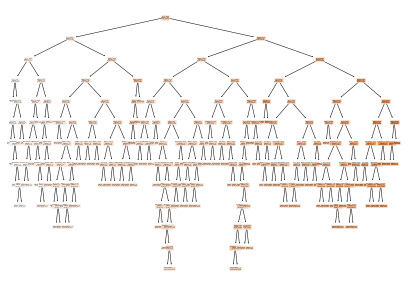

In [79]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = df.drop(columns = "Sales").columns,
            class_names   = 'Sales',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

Finalmente se testean los errores de los modelos inicial y final

In [80]:
# Error de test del modelo inicial
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 2.628526055495271


In [81]:
# Error de test del modelo final (tras aplicar pruning)
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 1.3545478950557637
